## This notebook illustrates Character, Word and Line level segmentation using OpenCV for Text Detection

## Character Level Segmentation

(<AxesSubplot:title={'center':'Character'}>,
 Text(0.5, 1.0, 'Character'))

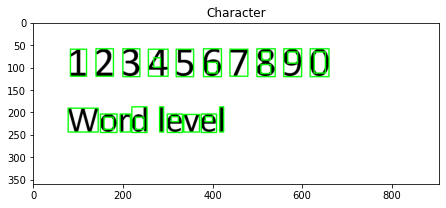

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('segmentation-image.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Character')

## Word Level Segmentation

(<AxesSubplot:title={'center':'Word'}>,
 Text(0.5, 1.0, 'Word'))

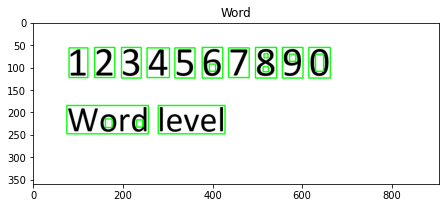

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('segmentation-image.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
kernel = np.ones((5,5), np.uint8)
thresh = cv2.dilate(thresh,kernel,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Word')

## Line Level Segmentation

(<AxesSubplot:title={'center':'Line'}>,
 Text(0.5, 1.0, 'Line'))

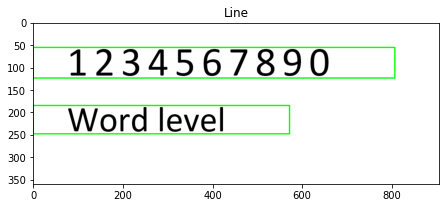

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('segmentation-image.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
kernel = np.ones((5,100), np.uint8)
thresh = cv2.dilate(thresh,kernel,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('Line')